In [119]:
import pandas as pd

data_frame = pd.read_csv('data_preprocessed.csv')
print(data_frame.head())

   Age_Scaled  Gender_Male  Hormonal Changes_Postmenopausal  \
0    1.400418        False                            False   
1   -0.332606        False                            False   
2    2.337187        False                             True   
3    1.821964        False                            False   
4   -0.051575         True                             True   

   Family History_Yes  Race/Ethnicity_African American  Race/Ethnicity_Asian  \
0                True                            False                  True   
1                True                            False                  True   
2               False                            False                 False   
3               False                            False                 False   
4                True                             True                 False   

   Race/Ethnicity_Caucasian  Body Weight_Underweight  Calcium Intake_Low  \
0                     False                     True            

In [120]:
target_column = 'Osteoporosis'

X = data_frame.drop(columns=target_column)
y = data_frame[target_column]

feature_names = X.columns.to_list()

class_names = ['No Osteoporosis', 'Yes Osteoporosis']

print(f"Số lượng đặc điểm (features): {len(feature_names)}")
print(f"Các đặc điểm: {feature_names}")

Số lượng đặc điểm (features): 17
Các đặc điểm: ['Age_Scaled', 'Gender_Male', 'Hormonal Changes_Postmenopausal', 'Family History_Yes', 'Race/Ethnicity_African American', 'Race/Ethnicity_Asian', 'Race/Ethnicity_Caucasian', 'Body Weight_Underweight', 'Calcium Intake_Low', 'Vitamin D Intake_Insufficient', 'Physical Activity_Sedentary', 'Smoking_Yes', 'Alcohol Consumption_Moderate', 'Medical Conditions_Hyperthyroidism', 'Medical Conditions_Rheumatoid Arthritis', 'Medications_Corticosteroids', 'Prior Fractures_Yes']


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Kích thước tập huấn luyện: {X_train.shape[0]} mẫu")
print(f"Kích thước tập kiểm tra: {X_test.shape[0]} mẫu")

Kích thước tập huấn luyện: 1370 mẫu
Kích thước tập kiểm tra: 588 mẫu


In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Tạo mô hình cơ sở
# Chúng ta sẽ không đặt max_depth ở đây
base_clf = DecisionTreeClassifier(random_state=42)

# 2. Định nghĩa lưới tham số (Parameter Grid)
# Chúng ta muốn thử max_depth từ 2 đến 20
param_grid = {
    'max_depth': list(range(2, 21)),  # Thử các giá trị [2, 3, 4, ..., 20]
    'min_samples_leaf': [5, 10, 20] # Thêm tham số khác để tránh overfitting
}

# 3. Khởi tạo Grid Search
# cv=5: Sử dụng 5-fold cross-validation
# scoring='accuracy': Ưu tiên độ chính xác (Bạn có thể đổi thành 'recall' hoặc 'f1')

# Thay vì scoring='accuracy', bạn nên dùng scoring='f1_macro' hoặc scoring='recall_macro'.

# scoring='recall_macro':

# Ý nghĩa: Tối ưu hóa điểm Recall trung bình của cả hai lớp (lớp 0 và lớp 1).

# Tác dụng: Nó sẽ tìm mô hình cố gắng "bắt" được nhiều nhất có thể ở cả nhóm bệnh và nhóm không bệnh. Nó trực tiếp giải quyết vấn đề "bỏ lỡ".

#scoring='f1_macro' (Khuyến nghị):

# Ý nghĩa: Tối ưu hóa điểm F1 trung bình của cả hai lớp.

# Tại sao nên dùng: F1-score là trung bình điều hòa của Precision và Recall. Nó tìm kiếm sự cân bằng giữa việc "không bỏ lỡ" (Recall cao) và "không báo động nhầm" (Precision cao).

# Tác dụng: Nó sẽ ngăn mô hình chỉ tập trung vào Recall mà tạo ra quá nhiều báo động nhầm (False Positives). Đây thường là thước đo cân bằng và tốt nhất cho các bài toán y tế có dữ liệu mất cân bằng.
# n_jobs=-1: Sử dụng tất cả CPU để chạy nhanh hơn
grid_search = GridSearchCV(estimator=base_clf, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='f1_macro', 
                           n_jobs=-1)

# 4. Huấn luyện Grid Search trên DỮ LIỆU HUẤN LUYỆN
# (Nó sẽ tự động thực hiện CV)
# X_train và y_train là dữ liệu bạn đã chia ở bước trước
grid_search.fit(X_train, y_train)

# 5. Xem kết quả tốt nhất
print(f"Tham số tốt nhất tìm được: {grid_search.best_params_}")
print(f"Điểm accuracy (CV) tốt nhất: {grid_search.best_score_:.4f}")

# 6. Lấy ra mô hình tốt nhất
best_clf = grid_search.best_estimator_

# 7. Đánh giá mô hình TỐT NHẤT này trên tập TEST
# Đây là kết quả cuối cùng
y_pred_best = best_clf.predict(X_test)
print("\n--- Kết quả của Mô hình Tốt nhất trên Tập Test ---")
print(classification_report(y_test, y_pred_best))

Tham số tốt nhất tìm được: {'max_depth': 7, 'min_samples_leaf': 10}
Điểm accuracy (CV) tốt nhất: 0.8975

--- Kết quả của Mô hình Tốt nhất trên Tập Test ---
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       285
           1       0.99      0.83      0.91       303

    accuracy                           0.91       588
   macro avg       0.92      0.91      0.91       588
weighted avg       0.92      0.91      0.91       588



In [123]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=7, random_state=42)

clf.fit(X_train, y_train)
print(f"Mô hình Decision Tree đã được huấn luyện!")

Mô hình Decision Tree đã được huấn luyện!


In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy) trên tập Test {accuracy * 100:.2f}%")

print(f"\nMa trận nhầm lẫn (Confusion Matric):")
print(confusion_matrix(y_test, y_pred))

print("\nBáo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred, target_names=class_names))

Độ chính xác (Accuracy) trên tập Test 91.84%

Ma trận nhầm lẫn (Confusion Matric):
[[282   3]
 [ 45 258]]

Báo cáo phân loại (Classification Report):
                  precision    recall  f1-score   support

 No Osteoporosis       0.86      0.99      0.92       285
Yes Osteoporosis       0.99      0.85      0.91       303

        accuracy                           0.92       588
       macro avg       0.93      0.92      0.92       588
    weighted avg       0.93      0.92      0.92       588



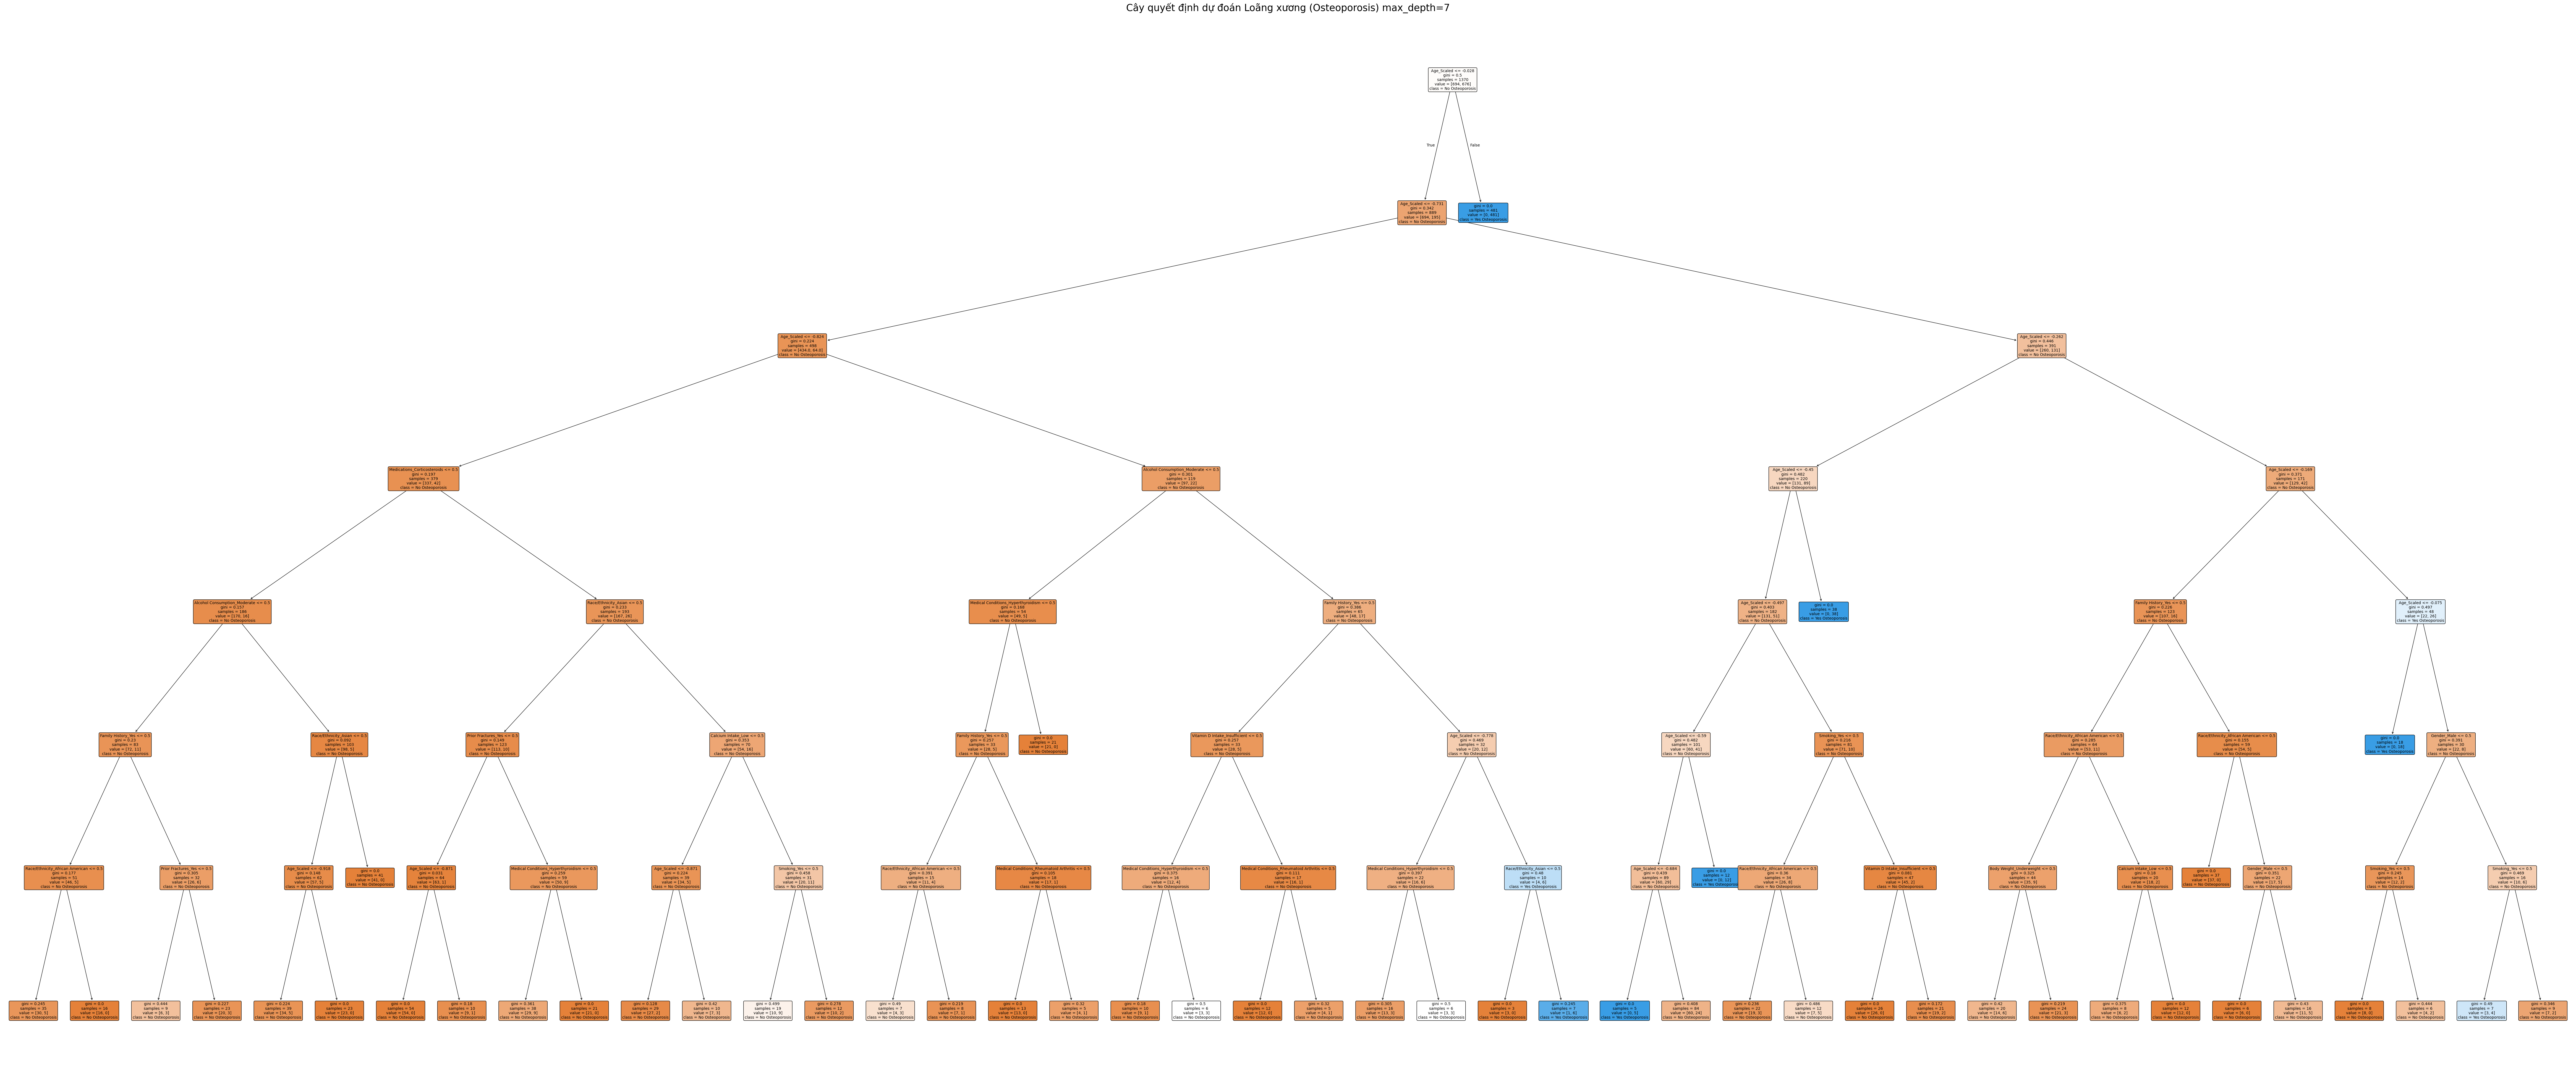

In [132]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(120, 50))

plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.title("Cây quyết định dự đoán Loãng xương (Osteoporosis) max_depth=7", fontsize=25)

# Lưu ảnh decision tree
plt.savefig("decision_tree_osteoporosis.png", bbox_inches='tight', dpi=150)

plt.show()

## Thảo luận về việc tinh chỉnh mô hình

Với Decison Tree có depth quá nông như 1, 2 nghĩa là sẽ hỏi ít câu hỏi do đó độ chính xác sẽ không cao -> Ta sẽ không xét \
Tương tự với depth quá sâu có thể dễ gây overfitting.

Xét các trường hợp max_depth = 3, 4, 5

#### Max_depth = 3
Khi đó các giá trị accuracy, confusion matrix và classification report sẽ là:

Độ chính xác (Accuracy) trên tập Test 86.05%

Ma trận nhầm lẫn (Confusion Matric):
[[285   0]
 [ 82 221]]

Báo cáo phân loại (Classification Report):
                  precision    recall  f1-score   support

 No Osteoporosis       0.78      1.00      0.87       285
Yes Osteoporosis       1.00      0.73      0.84       303

        accuracy                           0.86       588
       macro avg       0.89      0.86      0.86       588
    weighted avg       0.89      0.86      0.86       588

#### Max_depth = 4

Độ chính xác (Accuracy) trên tập Test 88.95%

Ma trận nhầm lẫn (Confusion Matric):
[[272  13]
 [ 52 251]]

Báo cáo phân loại (Classification Report):
                  precision    recall  f1-score   support

 No Osteoporosis       0.84      0.95      0.89       285
Yes Osteoporosis       0.95      0.83      0.89       303

        accuracy                           0.89       588
       macro avg       0.90      0.89      0.89       588
    weighted avg       0.90      0.89      0.89       588

#### Max_depth = 5

Độ chính xác (Accuracy) trên tập Test 90.48%

Ma trận nhầm lẫn (Confusion Matric):
[[285   0]
 [ 56 247]]

Báo cáo phân loại (Classification Report):
                  precision    recall  f1-score   support

 No Osteoporosis       0.84      1.00      0.91       285
Yes Osteoporosis       1.00      0.82      0.90       303

        accuracy                           0.90       588
       macro avg       0.92      0.91      0.90       588
    weighted avg       0.92      0.90      0.90       588 

### Nhận xét:

Với bài toán y tế, việc Bỏ sót Bệnh nhân (FN) thường nguy hiểm hơn nhiều so với việc Báo động Nhầm (FP). \
=> Có thể thấy dù depth = 5 có độ chính xác trên tập test cao hơn nhưng FN = 56 > FN = 52 của depth = 4 \
==> Nếu muốn mô hình tập trung vào việc tránh bỏ sót bệnh nhân thì chọn depth = 4; nếu muốn tránh báo động nhầm thì chọn depth = 5. \

Tuy nhiên việc lựa chọn tham số mô hình phải dựa vào nhiều lần chia và dùng các phương pháp đáng tin cậy khác như: Grid Search (Tìm kiếm lưới) kết hợp với Cross-Validation (Kiểm tra chéo).

### Kết luận

Sau khi chạy scoring = 'f1_macro' hay 'recall_macro' thì max_depth tốt nhất vẫn là 7 trong phương pháp tìm tham số mô hình tốt nhất ở trên.